Q1. perceptron learning algorithm (assignment -1 )

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys

color = ['green','red',"blue","yellow","pink"]
maxIteration = 1000000

class perceptron:
    def __init__(self,train,test):
        self.train = np.hstack((np.ones((train.shape[0],1)),train))
        self.test = np.array(test)
        self.w = self.perceptronAlgorithm(self.train)
    def perceptronAlgorithm(self,train):
        w = np.ones(train.shape[1]-1)
        l = train.shape[1]
        converge = False
        j=0
        while(not converge):
            i = np.random.randint(train.shape[0])
            x_i = train[i,:l-1]
            y = train[i][l-1]  
            if (y==1 and np.dot(w,x_i)<0):
                w=w+x_i 
            if (y==0 and np.dot(w,x_i)>0):
                w=w-x_i
            if(j>maxIteration ):
                converge=True
            j=j+1
        return w

In [2]:
def perceptronLine(data,w):
    x1=np.amin(data[:,0])
    x2=np.amax(data[:,1])
    y1= -(w[0]+w[1]*x1)/w[2]
    y2= -(w[0]+w[1]*x2)/w[2]
    line=[x1,x2,y1,y2]
    return line

def ploter(data,color,line):
    for i in data :
        cl=int(i[2])
        plt.scatter(i[0],i[1],color=color[cl])
    plt.plot([line[0],line[1]],[line[2],line[3]])
    plt.show()
def wploter(train,test,color,w):
    plt.subplot(1,2,1)
    for i in train :
        cl=int(i[2])
        plt.scatter(i[0],i[1],color=color[cl])
    line1=perceptronLine(train,w)
    plt.title("train")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.plot([line1[0],line1[1]],[line1[2],line1[3]])
    plt.subplot(1,2,2)
    plt.title("test")
    plt.xlabel("x1")
    plt.ylabel("x2")
    for i in test :
        cl=int(i[2])
        plt.scatter(i[0],i[1],color=color[cl])
    line2=perceptronLine(test,w)
    plt.plot([line2[0],line2[1]],[line2[2],line2[3]])
    plt.show()

In [8]:
class predictions:
    def lossfunction(self,train,w):
        train = np.hstack((np.ones((train.shape[0],1)),train))
        l = train.shape[1]
        prediction = []
        numMisclasification = 0
        truePositive = 0
        trueNegative = 0
        falsePositive = 0
        falseNegative = 0
        index = 0
        for i in train:
            x_i = i[:l-1]
            y = i[l-1]  
            prediction.append([ np.dot(x_i,w),int(y)])
            if (prediction[index][1]==0 and prediction[index][0]>=0):
                numMisclasification = numMisclasification+1
                falseNegative = falseNegative+1
            if (prediction[index][1]==0 and prediction[index][0]<=0):
                falsePositive = falsePositive + 1
            if (prediction[index][1]==1 and prediction[index][0]<0):
                numMisclasification = numMisclasification+1
                trueNegative = trueNegative + 1
            if (prediction[index][1]==1 and prediction[index][0]>=0):
                truePositive = truePositive + 1
            index = index+1
        self.loss = numMisclasification/train.shape[0]
        self.accuracy = (1-self.loss)*100
        self.predictList = prediction
        self.misclassification=numMisclasification
        self.truePositive=truePositive
        self.trueNegative = trueNegative
        self.falsePositive = falsePositive
        self.falseNegative = falseNegative

loss - testdata =  0.0
accuracy - testdata =  100.0
missclasification - test data =  0 

for test
true positive =  117
true negative =  0
false positve =  123
false Negative =  0 

loss - train data =   0.0
accuracy - train tdata =  100.0
missclasification - train data =  0 

for train
true positive =  483
true negative =  0
false positve =  477
false Negative =  0 



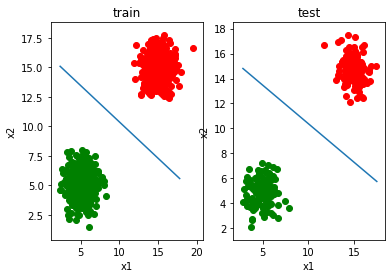

In [19]:
train = pd.read_csv("Datasets-Question1/dataset1/Train1.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset1/Test1.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)



loss - testdata =  0.0
accuracy - testdata =  100.0
missclasification - test data =  0 

for test
true positive =  122
true negative =  0
false positve =  118
false Negative =  0 

loss - train data =   0.0
accuracy - train tdata =  100.0
missclasification - train data =  0 

for train
true positive =  478
true negative =  0
false positve =  482
false Negative =  0 



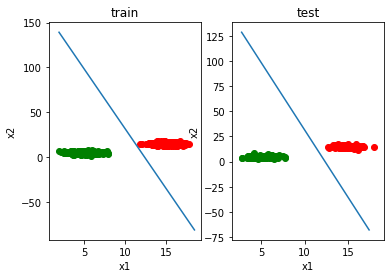

In [20]:
train = pd.read_csv("Datasets-Question1/dataset2/Train2.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset2/Test2.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)

loss - testdata =  0.008333333333333333
accuracy - testdata =  99.16666666666667
missclasification - test data =  2 

for test
true positive =  116
true negative =  1
false positve =  122
false Negative =  1 

loss - train data =   0.0
accuracy - train tdata =  100.0
missclasification - train data =  0 

for train
true positive =  483
true negative =  0
false positve =  477
false Negative =  0 



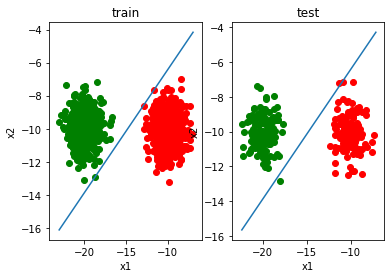

In [21]:
train = pd.read_csv("Datasets-Question1/dataset3/Train3.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset3/Test3.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)

loss - testdata =  0.22916666666666666
accuracy - testdata =  77.08333333333334
missclasification - test data =  55 

for test
true positive =  115
true negative =  10
false positve =  70
false Negative =  45 

loss - train data =   0.24375
accuracy - train tdata =  75.625
missclasification - train data =  234 

for train
true positive =  450
true negative =  25
false positve =  276
false Negative =  209 



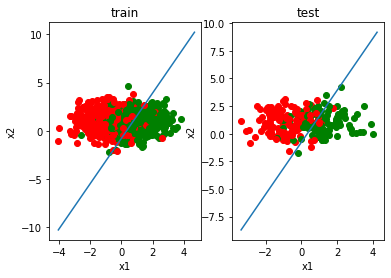

In [22]:
train = pd.read_csv("Datasets-Question1/dataset4/Train4.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset4/Test4.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)

loss - testdata =  0.0
accuracy - testdata =  100.0
missclasification - test data =  0 

for test
true positive =  118
true negative =  0
false positve =  122
false Negative =  0 

loss - train data =   0.003125
accuracy - train tdata =  99.6875
missclasification - train data =  3 

for train
true positive =  481
true negative =  2
false positve =  476
false Negative =  1 



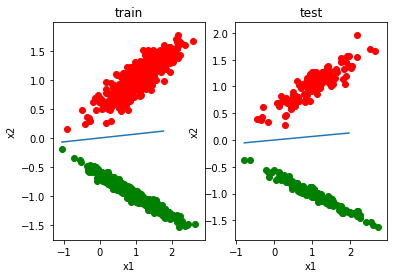

In [23]:
train = pd.read_csv("Datasets-Question1/dataset5/Train5.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset5/Test5.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)

loss - testdata =  0.5166666666666667
accuracy - testdata =  48.33333333333333
missclasification - test data =  124 

for test
true positive =  59
true negative =  61
false positve =  57
false Negative =  63 

loss - train data =   0.49166666666666664
accuracy - train tdata =  50.83333333333333
missclasification - train data =  472 

for train
true positive =  249
true negative =  231
false positve =  239
false Negative =  241 



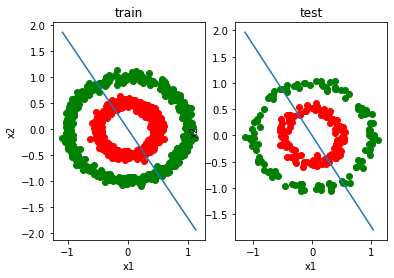

In [24]:
train = pd.read_csv("Datasets-Question1/dataset6/Train6.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset6/Test6.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)

loss - testdata =  0.13
accuracy - testdata =  87.0
missclasification - test data =  26 

for test
true positive =  105
true negative =  1
false positve =  69
false Negative =  25 

loss - train data =   0.1775
accuracy - train tdata =  82.25
missclasification - train data =  142 

for train
true positive =  391
true negative =  3
false positve =  267
false Negative =  139 



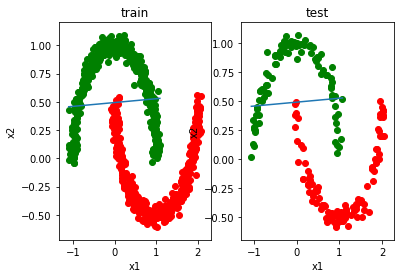

In [25]:
train = pd.read_csv("Datasets-Question1/dataset7/Train7.csv",header=None,names=["x1","x2","y"])
test = pd.read_csv("Datasets-Question1/dataset7/Test7.csv",header=None,names=["x1","x2","y"])

new_perceptron = perceptron(train,test)
train_prediction = predictions()
test_prediction = predictions()
train_prediction.lossfunction(np.array(train),new_perceptron.w)
test_prediction.lossfunction(np.array(test),new_perceptron.w)

print("loss - testdata = ",test_prediction.loss)
print("accuracy - testdata = ",test_prediction.accuracy)
print("missclasification - test data = ",test_prediction.misclassification,"\n")
print("for test")
print("true positive = ",test_prediction.truePositive)
print("true negative = ",test_prediction.trueNegative)
print("false positve = ",test_prediction.falsePositive)
print("false Negative = ", test_prediction.falseNegative,"\n")

print("loss - train data =  ",train_prediction.loss)
print("accuracy - train tdata = ",train_prediction.accuracy)
print("missclasification - train data = ",train_prediction.misclassification,"\n")

print("for train")
print("true positive = ",train_prediction.truePositive)
print("true negative = ",train_prediction.trueNegative)
print("false positve = ",train_prediction.falsePositive)
print("false Negative = ", train_prediction.falseNegative,"\n")
wploter(np.array(train),np.array(test),color,new_perceptron.w)